In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline
def extract_log(log_path):
    logs = []
    with open(log_path) as f:
        for line in f.readlines():
            if line.startswith('epoch'):
                line = line.strip()
                fields = line.split(',')
                log = [float(field.split(':')[1].strip()) for field in fields]
                logs.append(log)
    return logs

def get_cmap(N):
    color_norm  = colors.Normalize(vmin=0, vmax=N)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

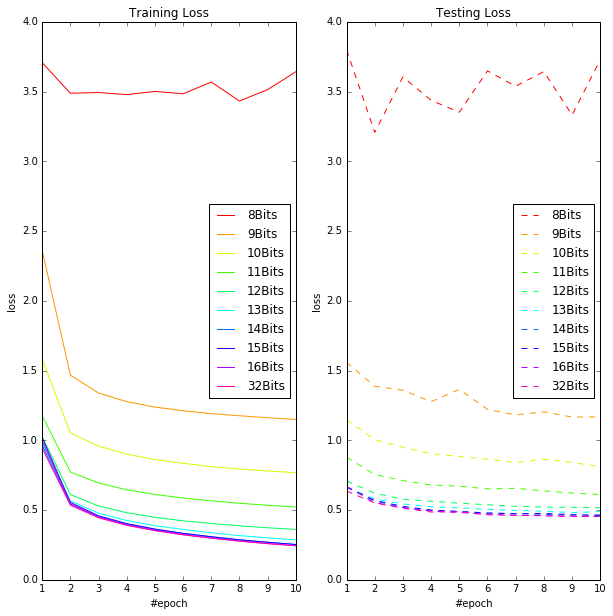

In [12]:
exp_path = '/home/chenxi/experiments/dssm/exps/'
#exps = ['12Bits', '16Bits', '20Bits', '24Bits', '28Bits', '32Bits']
exps = [str(i) + 'Bits' for i in range(8, 17)] + ['32Bits']
cls = get_cmap(len(exps))
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, exp in enumerate(exps):
    log_path = os.path.join(exp_path, exp, 'log')
    if os.path.exists(log_path):      
        logs = extract_log(log_path)
        logs = np.array(logs)
        train = logs[:, 1]
        val = logs[:, 3]
        color = cls(i)
        ax1.plot(np.arange(len(train)) + 1, train, '-', c=color, label=exp)
        ax2.plot(np.arange(len(val)) + 1, val, '--', c=color, label=exp)
ax1.set_xlabel('#epoch')
ax1.set_ylabel('loss')
ax1.set_title('Training Loss')
ax1.legend(loc='best')

ax2.set_xlabel('#epoch')
ax2.set_ylabel('loss')
ax2.set_title('Testing Loss')
ax2.legend(loc='best')

plt.savefig('../vis/8-16bits.jpg')
plt.show()